# Epoch Evaluation

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [6]:
# Load data from csv file with metrics from ARVAE trained model 

dataset = pd.read_csv("/home/rfernandes/AllerGenProt/epoch_evaluation/allergy_arvae.csv")


In [8]:
dataset

,epoch,aa_acc,acc,kl_loss,loss,vae_loss,val_aa_acc,val_acc,val_kl_loss,val_loss,val_vae_loss,val_xent_loss,xent_loss
0,0,0.093309,0.527050,18.495598,802.275317,802.275317,0.110009,0.535357,0.545102,761.015728,761.015728,760.470618,783.779718
1,1,0.111374,0.538908,0.552655,753.411375,753.411375,0.114686,0.537962,0.465755,755.103028,755.103028,754.637267,752.858721
2,2,0.114521,0.540519,0.554276,750.129667,750.129667,0.117460,0.537869,0.529228,755.613571,755.613571,755.084338,749.575392
3,3,0.115832,0.541350,0.540194,748.448580,748.448580,0.119566,0.540657,0.551889,751.013673,751.013673,750.461779,747.908386
4,4,0.117333,0.541995,0.567428,747.229777,747.229777,0.120658,0.541680,0.575133,748.263815,748.263815,747.688682,746.662348
5,5,0.118442,0.542617,0.603182,746.110520,746.110520,0.122219,0.543107,0.644198,747.032602,747.032602,746.388403,745.507336
6,6,0.119586,0.543256,0.642556,745.033380,745.033380,0.123172,0.539235,0.636741,753.789051,753.789051,753.152313,744.390825
7,7,0.120664,0.543787,0.659808,744.156685,744.156685,0.124609,0.539802,0.679459,752.031104,752.031104,751.351643,743.496880
8,8,0.122032,0.544655,0.738004,742.853800,742.853800,0.126618,0.543961,0.654832,746.354033,746.354033,745.699201,742.115793
9,9,0.123717,0.545439,0.866230,741.819508,741.819508,0.128199,0.547785,1.081856,740.417219,740.417219,739.335359,740.953276


In [9]:
#Verify the epoch with the best validation loss

val_loss = dataset['val_loss']
best_epoch = val_loss.sort_values()
best_epoch = best_epoch.index[0
                              ]
best_epoch


16

In [10]:
# Have a better view of the vlaidation loss data

val_loss.sort_values()

16    730.523753
18    731.769172
21    735.013548
24    736.212517
22    738.125136
23    738.508693
26    739.302431
20    739.715538
9     740.417219
15    740.533134
25    741.240897
19    741.596872
12    741.612974
14    742.758518
13    743.159084
11    744.978486
8     746.354033
10    746.612637
5     747.032602
17    747.695168
4     748.263815
3     751.013673
7     752.031104
6     753.789051
1     755.103028
2     755.613571
0     761.015728
Name: val_loss, dtype: float64

In [11]:
# Have a better view of the validation accuracy data

val_acc = dataset['val_acc']
acc_sorted = val_acc.sort_values(ascending=False)
acc_sorted

16    0.555348
18    0.555251
24    0.553810
21    0.553390
23    0.552281
22    0.552174
26    0.551680
20    0.550541
25    0.550206
19    0.549637
15    0.549321
12    0.548791
14    0.547999
9     0.547785
13    0.547611
11    0.546702
17    0.545915
10    0.545068
8     0.543961
5     0.543107
4     0.541680
3     0.540657
7     0.539802
6     0.539235
1     0.537962
2     0.537869
0     0.535357
Name: val_acc, dtype: float64

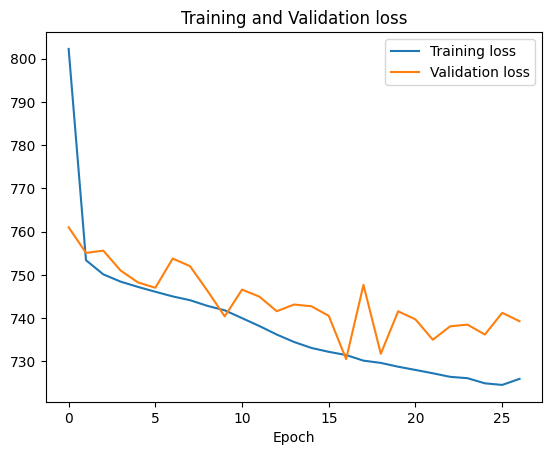

In [12]:
#Compare the training and validation loss

plt.plot(dataset['loss'])
plt.plot(dataset['val_loss'])
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.legend(['Training loss', 'Validation loss'], loc='best')

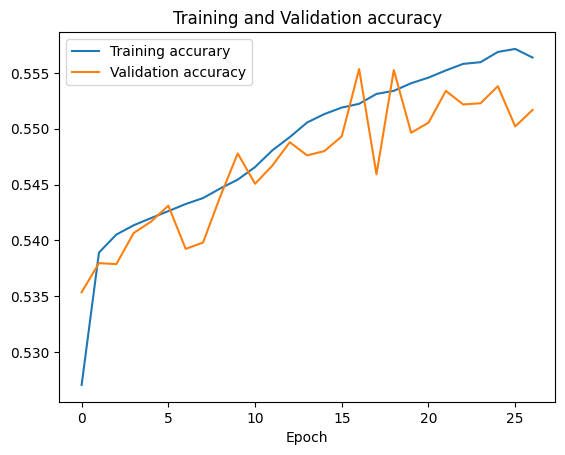

In [13]:
# Comparing the training and validation accuracy

plt.plot(dataset['acc'])
plt.plot(dataset['val_acc'])
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accurary', 'Validation accuracy'], loc='best')

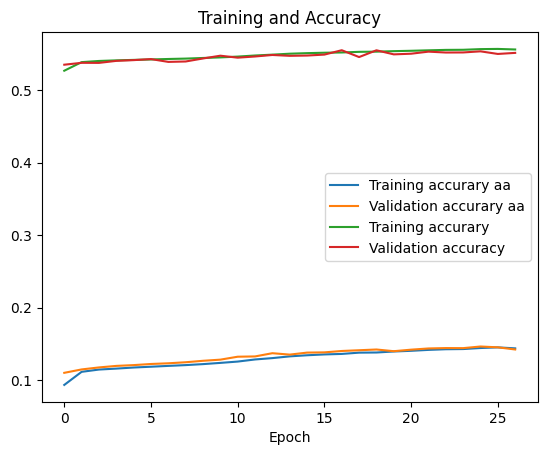

In [14]:
# Comparing the training and validation accuracy for sequence and for wich amino acid

plt.plot(dataset['aa_acc'])
plt.plot(dataset['val_aa_acc'])
plt.plot(dataset['acc'])
plt.plot(dataset['val_acc'])
plt.title('Training and Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accurary aa', 'Validation accurary aa','Training accurary', 'Validation accuracy'], loc='best')